### The esports Industry - insights of a billionaire but also earlystage growing industry

My goal is to get a better understanding at some of the insights from future and current esports gamers in the industry of esports. 

For one moment, let's imagine that I want to invest my time and passion into the videogames industry and I want to make money out of my excellent player skills. 
- What games do I have a best stake at? 
- What is the genre and game where I should put my time and effort to in order to try to become a pro videogame player?

In [148]:
#importing libraries

import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
from scipy import stats
from scipy.stats import ttest_ind_from_stats
from scipy.stats import norm
import math
import scipy.stats

### Exploratory Data Analysis (EDA)

I have colected Data from different sources. First of all, I am working with two datasets from Kaggle, which give me the info about the main stats per game in the esports history. 

In [2]:
#reading the csv we have founded 
esports_historical = pd.read_csv('Data/HistoricalEsportData.csv', encoding='latin-1')
esports_games = pd.read_csv('Data/GeneralEsportData.csv', encoding='latin-1')

In [3]:
#understanding the dataset of the esports history

esports_historical.head(3)

,Date,Game,Earnings,Players,Tournaments
0,1/1/1998,QuakeWorld,15000.0,8,1
1,5/1/1998,Quake II,14600.0,4,1
2,7/1/1998,Quake II,15000.0,5,1


From this dataset : 
- We can understand how many tournaments per year a games has had 
- How much each tournament has given on prizes 
- How many players won a prize 

In [4]:
#understanding the dataset of the esports history

esports_games.head(3)

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,190075.61,33235.72,246,95
1,Age of Empires II,1999,Strategy,1480089.01,862909.14,827,549
2,Age of Empires III,2005,Strategy,66463.85,24963.85,86,72


From this dataset we can get an understanding: 
- At the genre of the game, the total tournaments ever and total eranings ever

#### Let's try to understand now the variables and info we have

In [5]:
esports_games.info()

#Every column has the expected data type. There are no null values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Game              492 non-null    object 
 1   ReleaseDate       492 non-null    int64  
 2   Genre             492 non-null    object 
 3   TotalEarnings     492 non-null    float64
 4   OnlineEarnings    492 non-null    float64
 5   TotalPlayers      492 non-null    int64  
 6   TotalTournaments  492 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 27.0+ KB


In [6]:
esports_historical.info()

#Here, we can see that the date is an object, we should turn this into a numerical variable. There are no null values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6104 entries, 0 to 6103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         6104 non-null   object 
 1   Game         6104 non-null   object 
 2   Earnings     6104 non-null   float64
 3   Players      6104 non-null   int64  
 4   Tournaments  6104 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 238.6+ KB


In [7]:
#how many unique games has the data set

esports_games.Game.nunique()#there are 492 games. 
esports_games.Genre.value_counts() #there are no duplicates.

Fighting Game                      161
First-Person Shooter               104
Sports                              66
Racing                              49
Strategy                            45
Multiplayer Online Battle Arena     21
Collectible Card Game               14
Puzzle Game                         13
Battle Royale                        8
Third-Person Shooter                 6
Role-Playing Game                    5
Name: Genre, dtype: int64

### Logic of the project 

We want to predict what is the average fame per game and what is the best point to join the game to make more money. Can we predict what is the probability that the average number of tournaments and earning will be lower the following year? 

We need to understand what is the distribution of each game since it started its competition, per earning and per number of tournaments, as well as per money per winner. Does the genre of the game affect to this?

We also need to take a look at the average number of years a game is famous or prolific in the esports industry. 

For that, we will need to select a number of games. Let's look at the data and try to transform it for the best analysis possible. 

### Data Cleaning & Data Wrangling

In [8]:
#let's try to understand how many tournaments per year were per game

#since the date column is an object, we are going to create two news columns:
#one new column will store the years
esports_historical['Year'] = esports_historical['Date'].str.extract(r'(\d{4})') #creating a year column 

#the other column will store the months
esports_historical['Month'] = esports_historical['Date'].str.extract(r'(\d+/)') #creating a month column
esports_historical['Month'] = [i.replace('/','') for i in esports_historical['Month']] #cleaning the month column
esports_historical = esports_historical.drop(['Date'], axis = 1)

#let's take a look at the final result
esports_historical.head(3)

,Game,Earnings,Players,Tournaments,Year,Month
0,QuakeWorld,15000.0,8,1,1998,1
1,Quake II,14600.0,4,1,1998,5
2,Quake II,15000.0,5,1,1998,7


Now we can take a look at the tournaments per year and month

In [9]:
esports_historical.groupby(['Year','Month']).sum().head(20)

#we can see that we don't have information about all the months. 
#We assume that this means that the months without records have 0 tournaments.
#however, we want to take a look at it by year, so we can drop the month column

esports_historical = esports_historical.drop('Month', axis=1)

In [10]:
esports_historical.info()

esports_historical.Year = esports_historical.Year.astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6104 entries, 0 to 6103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Game         6104 non-null   object 
 1   Earnings     6104 non-null   float64
 2   Players      6104 non-null   int64  
 3   Tournaments  6104 non-null   int64  
 4   Year         6104 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 238.6+ KB


Now that we have cleaned the dataset, we want to complement this data with some of the columns of the other dataset, like the Genre of the videogame and the release date of the game. We don't need the information regarding Total Earnings, Players, Tournaments, etc. 

In [11]:
esports = pd.merge(esports_historical, esports_games, how='left', on='Game').drop(['OnlineEarnings','TotalPlayers'], axis=1)

In [12]:
esports

,Game,Earnings,Players,Tournaments,Year,ReleaseDate,Genre,TotalEarnings,TotalTournaments
0,QuakeWorld,15000.00,8,1,1998,1996,First-Person Shooter,99083.70,14
1,Quake II,14600.00,4,1,1998,1997,First-Person Shooter,140179.50,10
2,Quake II,15000.00,5,1,1998,1997,First-Person Shooter,140179.50,10
3,QuakeWorld,6500.00,4,1,1998,1996,First-Person Shooter,99083.70,14
4,Quake II,36600.00,13,2,1998,1997,First-Person Shooter,140179.50,10
...,...,...,...,...,...,...,...,...,...
6099,Dengeki Bunko: Fighting Climax Ignition,135.50,3,1,2020,2015,Fighting Game,2852.80,10
6100,Puyo Puyo Tetris,112.20,3,1,2020,2014,Puzzle Game,2861.14,14
6101,Samurai Shodown V Special,100.46,3,1,2020,2004,Fighting Game,590.57,5
6102,Brawlhalla,95.00,2,1,2020,2015,Fighting Game,1159994.09,387


In [13]:
#now we want to understand on average what is prize per player awarded

esports['Price_per_Person'] = round((esports['Earnings']/esports['Players']),2)
esports = esports[['Game','Genre','ReleaseDate','Earnings','TotalEarnings','Price_per_Person','Players','Tournaments','TotalTournaments','Year']]

In [14]:
esports.head(3)

,Game,Genre,ReleaseDate,Earnings,TotalEarnings,Price_per_Person,Players,Tournaments,TotalTournaments,Year
0,QuakeWorld,First-Person Shooter,1996,15000.0,99083.7,1875.0,8,1,14,1998
1,Quake II,First-Person Shooter,1997,14600.0,140179.5,3650.0,4,1,10,1998
2,Quake II,First-Person Shooter,1997,15000.0,140179.5,3000.0,5,1,10,1998


### We have created a new dataset and cleaned it. Now let's take a look: 

If we take a look, now we have a dataset with the genre, the release date, the year and month the tournaments happened and the earnings per tournament and amount of winners. We have also created a column that gathers the average prize per tournament. 

We want to also understand how many years has been each game in the esports tournament and how many years it took them until they started in the esports competitions since their release date.

In [192]:
#To understand how many years has each game being been player we are going to create a new column 

Years = [] #first we create a list for the Years playing
First_Tournament = [] #we also create a list for the year of the first tournament
Last_Tournament = [] #we also create a list for the year of the last tournament
Awakening = [] #we also create a list to calculate the average years 

#in a for loop we go through each game and we calculate the difference between the maximum year and the minimum year
for game in esports_historical.Game:
    year_max = esports_historical.loc[esports_historical['Game'] == game].Year.max()
    year_min = esports_historical.loc[esports_historical['Game'] == game].Year.min()
    year = year_max - year_min
    First_Tournament.append(year_min)
    Last_Tournament.append(year_max)
    Years.append(year)


#we assign that list to the new column
esports['years_playing'] = Years
esports['last_tournament'] = First_Tournament
esports['last_tournament'] = Last_Tournament


#in a for loop with the columns we have just created and calculate the years it takes for a game to have their first tournament in esports.  
for game in esports.Game:
    year_min = int(esports.loc[esports_historical['Game'] == game].Year.min())
    release = int(esports.loc[esports_historical['Game'] == game].ReleaseDate.unique())
    year = year_min - release
    Awakening.append(year)
    
esports['Awakening'] = Awakening

<ipython-input-192-2d8b16e42223>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esports['years_playing'] = Years
<ipython-input-192-2d8b16e42223>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esports['last_tournament'] = First_Tournament
<ipython-input-192-2d8b16e42223>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [193]:
esports.head(9)

,Game,Genre,ReleaseDate,Earnings,TotalEarnings,Price_per_Person,Players,Tournaments,TotalTournaments,Year,years_playing,last_tournament,Awakening,log_earnings
0,QuakeWorld,First-Person Shooter,1996,15000.0,99083.70,1875.00,8,1,14,1998,21,2019,2,9.615805
1,Quake II,First-Person Shooter,1997,14600.0,140179.50,3650.00,4,1,10,1998,21,2019,1,9.588777
2,Quake II,First-Person Shooter,1997,15000.0,140179.50,3000.00,5,1,10,1998,21,2019,1,9.615805
3,QuakeWorld,First-Person Shooter,1996,6500.0,99083.70,1625.00,4,1,14,1998,21,2019,2,8.779557
4,Quake II,First-Person Shooter,1997,36600.0,140179.50,2815.38,13,2,10,1998,21,2019,1,10.507804
5,QuakeWorld,First-Person Shooter,1996,22000.0,99083.70,inf,0,1,14,1998,21,2019,2,9.998798
6,StarCraft: Brood War,Strategy,1998,20000.0,8251181.43,2500.00,8,1,571,1998,22,2020,0,9.903488
7,Age of Empires,Strategy,1997,2000.0,190075.61,2000.00,1,1,95,1998,22,2020,1,7.600902
8,Quake II,First-Person Shooter,1997,15000.0,140179.50,3000.00,5,1,10,1999,21,2019,1,9.615805


### As new players, we are not looking for the historical data, rather than useful data about how games behave:

- Average time a game has from their release date to the have their first tournament in esports, to understand how news games behave. If this period of time is short, we could opt for a new game because we know in a short period of time we will have tournaments.

- It is also important to understand if the number of tournaments is related somehow to the pool of prices of that game. If a game is really popular and has a lot of tournaments, are the prozes bigger too?

- We need to understand which Genre and type of game gives better prizes

- Also, we need to know which Genre has a trend and has more tournaments.

In [194]:
#On average, the awakening per genre and of the entire population is as follows

display(esports.Awakening.mean()) #total mean of the entire population says that a game takes one year to become esports available.

sample = esports

con_coef= 0.95
n = len(sample)-1
ave = sample['Awakening'].mean()
sigma = stats.sem(sample['Awakening'])

s = scipy.stats.t.interval(con_coef , n, loc=ave, scale=sigma)
print(s)

print(f'We are 95% sure that the population mean lies within the range of lower {round(s[0], 3)} and upper {round(s[1], 3)} limit')

1.020478374836173

(0.9459534551089309, 1.0950032945634152)
We are 95% sure that the population mean lies within the range of lower 0.946 and upper 1.095 limit


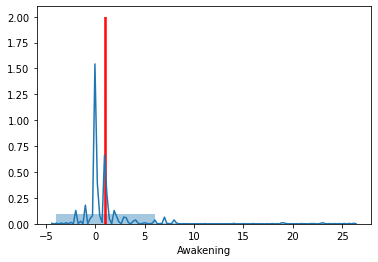

In [156]:
sns.distplot(sample['Awakening'], bins = 3)
plt.vlines([s[0], s[1]], 0, 2.0, color = 'red')
plt.show()

#### Here we can observe how most of the games do get into the esports tournaments only one year after being released, which is something to take into account when selecting a game to play.

We can see in the head that we need to fix one of the variables, since we must have divided by zero at some point when creating the price per person column, and we have some infinite values. 

In [ ]:
#this means that in this tournaments, no player was awarded with the prize. Therefore the inf values should be 0
esports.loc[esports['Price_per_Person'] == np.inf] = 0

Now that we have our desired database, we can start to analyze the relationship between the variables and start answering the questions que placed in the beggining. 

Does the number of tournaments and the amount of millions of dollars awarded have relationship between them. Let's say, if a game has more tournamenst, does it also have bigger prizes?

In [19]:
df = esports.groupby('Game')['Tournaments','Earnings'].sum().corr()
display(df)

<ipython-input-19-980cc23cdbbc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = esports.groupby('Game')['Tournaments','Earnings'].sum().corr()


,Tournaments,Earnings
Tournaments,1.000000,0.515972
Earnings,0.515972,1.000000


There is a strong correlation between the Earnings and the Price per person category, but unlike we thought in the beginning the games that have big earnings don't necessary have more tournaments than others

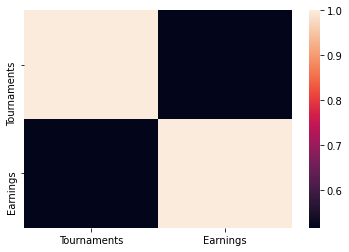

In [20]:
sns.heatmap(df)

We can say that we can not assume that because these game has had more tournaments, it will also have bigger prizes.

## Data Visualization

Text(0, 0.5, 'Year Distribution of Esports tournaments')

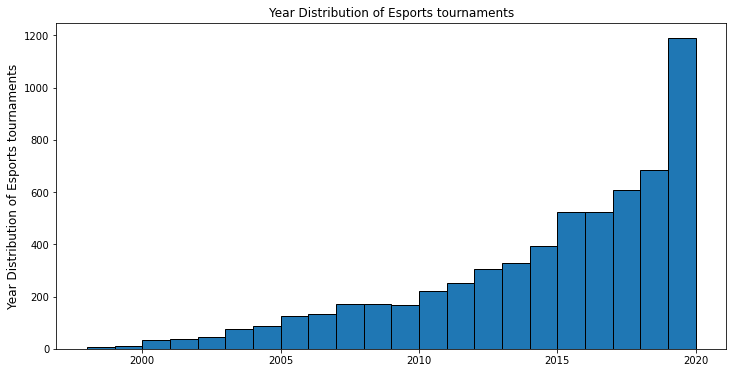

In [21]:
#first, let's take a look at the tournaments of esports and their evolution

fig,ax = plt.subplots(1, 1, figsize=(12, 6))

ax.hist(esports['Year'], alpha=1, histtype='bar', ec='black', bins=22)
ax.set_title('Year Distribution of Esports tournaments', fontsize=12)
ax.set_ylabel('Year Distribution of Esports tournaments', fontsize=12)

In [24]:
#As we can see here, from 2010, there has been an exponential growth of number of tournaments. 

#let's check in numbers how many tournaments we have had per year 
esports.groupby('Year')['Tournaments'].sum().sort_values(ascending=False)
#most of the torunaments have happened from 2010 and 2020, with 2015 being the most populated year. 

esports.groupby('Year')['Earnings'].sum().sort_values(ascending=False)
#however, the biggest year in earnings was 2019, 2018, and 2017. 

Year
2019    2.324307e+08
2018    1.650773e+08
2017    1.162927e+08
2016    9.810144e+07
2015    6.717864e+07
2020    4.998546e+07
2014    3.761709e+07
2013    2.225681e+07
2012    1.417111e+07
2011    1.054632e+07
2008    7.463214e+06
2007    7.440037e+06
2010    6.323567e+06
2006    5.648607e+06
2005    4.305727e+06
2009    4.129020e+06
2004    2.836501e+06
2003    1.774600e+06
2002    9.682196e+05
2001    8.937645e+05
2000    7.453075e+05
1999    2.751538e+05
1998    1.317000e+05
Name: Earnings, dtype: float64

Can we check if there are significance between genres?

In [29]:
#since 2019 was the year with a biggest prize pool, let's check if there were significant differences between the earnings per genre
esports[esports['Year']==2019].groupby('Genre')['Earnings'].mean().sort_values(ascending=False)



Genre
Battle Royale                      1.794569e+06
Multiplayer Online Battle Arena    1.346751e+06
First-Person Shooter               4.773931e+05
Third-Person Shooter               2.500000e+05
Collectible Card Game              2.201581e+05
Sports                             1.994573e+05
Role-Playing Game                  9.116667e+04
Strategy                           6.262272e+04
Racing                             2.718301e+04
Fighting Game                      1.534415e+04
Puzzle Game                        1.483098e+03
Name: Earnings, dtype: float64

In [31]:
#Does Battle Royale and Multiplayer Online Battle Arena also make the top 3 in the last 5 years?

@interact(years = esports.Year.unique())
def explore(years):
        df = esports[esports['Year']==years].groupby('Genre')['Earnings'].mean().sort_values(ascending=False)
        display(df)
        
#they are top 2 in 2018, 2017, and top 3 in 2016,2015. In 2014, Battle Royale didn't exist. 

interactive(children=(Dropdown(description='years', options=(1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2…

In [33]:
@interact(years = esports.Year.unique())
def explore(years):
        df = esports[esports['Year']== years].groupby('Genre')['Tournaments'].mean().sort_values(ascending=False)
        display(df)
        
#In 2019 Battle Royale and Multiplayer Online Battle Arena are also in the top 3, and in 2018. 

interactive(children=(Dropdown(description='years', options=(1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2…

In [178]:
#here we can see the evolution of each genre per year per number of tournaments. 

@interact(genres = esports.Genre.unique())
def explore(genres):
        df = esports.loc[(esports['Genre']== genres)&(esports['Year']<2020)].groupby(['Year'])['Tournaments'].sum() 
        display(
                df.groupby(['Year']).sum().plot(),)

#we can see that every genre has actually peaked after 2010

interactive(children=(Dropdown(description='genres', options=('First-Person Shooter', 'Strategy', 'Fighting Ga…

We are going to analyze deeper into the categories of Battle Royale and Multiplayer Online Battle Arena because they are not only the categories that have been having best earnings in the last 4-5 years, but also are among the ones having more tournaments, which could mean than If I invest in these categories I can not only make a lot of money, but also have more chances to win more money. 

##### But, which one should I go for?

In [52]:
#Let's check if there is a significant difference between the means of earnings in 2019
#Also, ideally we want to check if the difference between price per person in this category is also signficant. 

avg_earnings_BattleRoyale = esports[(esports["Year"]==2019) & (esports["Genre"]=='Battle Royale')]['Earnings'].mean()
avg_earnings_Multiplayer = esports[(esports["Year"]==2019) & (esports["Genre"]=='Multiplayer Online Battle Arena')]['Earnings'].mean()

print(f'''In 2019 the average prize pool for Battle Royale was: {round(avg_earnings_BattleRoyale , 1)}and 
      the average for Multiplayer was: {round(avg_earnings_Multiplayer , 1)}''')

std_br = esports[(esports["Year"]==2019) & (esports["Genre"]=='Battle Royale')]['Earnings'].std()
std_mp = esports[(esports["Year"]==2019) & (esports["Genre"]=='Multiplayer Online Battle Arena')]['Earnings'].std()

In 2019 the average prize pool for Battle Royale was: 1794569.0and 
      the average for Multiplayer was: 1346750.8


In [58]:
#apparently, Battle Royale has bigger prize pools than Multiplayer, let's confirm it or not

# Fail to Reject H0: All sample distributions are equal.
# Reject H0: One or more sample distributions are not equal.

alpha = 0.05

sample_lenght =len(esports[(esports["Year"]==2019) & (esports["Genre"]=='Battle Royale')]['Earnings'])
statistic, p_value = ttest_ind_from_stats(mean1=avg_earnings_BattleRoyale, std1=std_br, nobs1=len((esports[(esports["Year"]==2019) & (esports["Genre"]=='Battle Royale')]['Earnings'])),
                     mean2=avg_earnings_Multiplayer, std2=std_mp, nobs2=len(esports[(esports["Year"]==2019) & (esports["Genre"]=='Multiplayer Online Battle Arena')]['Earnings']),
                     equal_var = False)

#Si p-value < alpha: el resultado es significativo. Desechamos la hipótesis nula.
if p_value < alpha:
    print("We can reject the null hypothesis")
else:
    print("All means are equal")


All means are equal
0.670403813409385


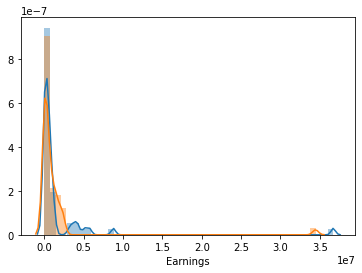

In [61]:
sns.distplot((esports[(esports["Year"]==2019) & (esports["Genre"]=='Battle Royale')]['Earnings']))
sns.distplot((esports[(esports["Year"]==2019) & (esports["Genre"]=='Multiplayer Online Battle Arena')]['Earnings']))

In [184]:
esports['log_earnings'] = np.log(esports[esports['Earnings']!= 0]['Earnings'])

<ipython-input-184-a8493601f64e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esports['log_earnings'] = np.log(esports[esports['Earnings']!= 0]['Earnings'])


array([False])

We can see that price distribution is not normal, we will need to apply log to normalize it:

In [126]:
#let's check that there is a significance variable with the third top genre. 

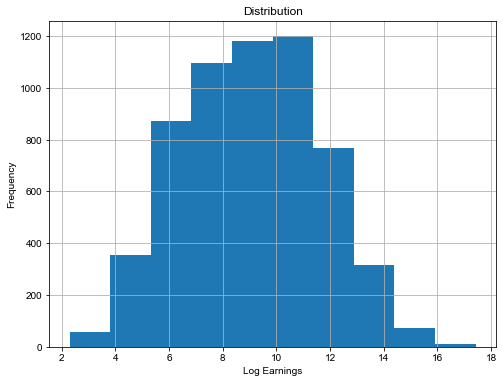

In [185]:
fig, ax = plt.subplots(1, figsize=(8,6))
plt.style.use('seaborn')

esports.log_earnings.plot(kind='hist', rot=0, bins=10)
plt.xlabel('Log Earnings')
plt.ylabel('Frequency')
plt.title('Distribution')

plt.show()

Althought we thought Battle Royale made more money for games, indeed, we have failed to prove that the means of the earnings are not equal, therefore we can not choose one of both genres based on the earnings.

Let's take a look then at the other significant variable, the number of tournaments per years. Let's remember that if I enter a genre with lots of tournaments and also high pools of prizes, even though I can not say it will more likely to win in here, because we don't have information about difficulty, number of total players per tournament or winning stats, we can agree that at least, we will have more opportunities to win a prize.

Let's take a look now at number of tournaments per year 


In [170]:
df = esports[(esports['Genre']=='Multiplayer Online Battle Arena') | (esports["Genre"]=='Battle Royale')]

In [175]:
df.groupby(['Genre'])['Tournaments'].mean()

Genre
Battle Royale                      9.902655
Multiplayer Online Battle Arena    9.738462
Name: Tournaments, dtype: float64

In [176]:
avg_tournaments_BattleRoyale = df[df['Genre']=='Battle Royale']['Tournaments'].mean()
avg_tournaments_Multiplayer = df[df['Genre']=='Multiplayer Online Battle Arena']['Tournaments'].mean()

std_br = df[df['Genre']=='Battle Royale']['Tournaments'].std()
std_mp = df[df['Genre']=='Multiplayer Online Battle Arena']['Tournaments'].std()

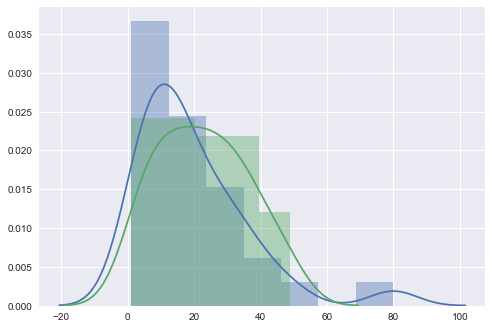

In [201]:
sns.distplot(esports[esports["Genre"]=='Battle Royale']['Tournaments'].unique())
sns.distplot(esports[esports["Genre"]=='Multiplayer Online Battle Arena']['Tournaments'].unique())

In [177]:
#apparently, Battle Royale has more tournaments than multiplayer, let's confirm it or not

# Fail to Reject H0: All sample distributions are equal.
# Reject H0: One or more sample distributions are not equal.

alpha = 0.05

sample_lenght =len(df['Tournaments'])
statistic, p_value = ttest_ind_from_stats(mean1=avg_tournaments_BattleRoyale, std1=std_br, nobs1=len(df[df['Genre']=='Battle Royale']['Tournaments']),
                     mean2=avg_tournaments_Multiplayer, std2=std_mp, nobs2=len(df[df['Genre']=='Multiplayer Online Battle Arena']['Tournaments']),
                     equal_var = False)

#Si p-value < alpha: el resultado es significativo. Desechamos la hipótesis nula.
if p_value < alpha:
    print("We can reject the null hypothesis")
else:
    print("All means are equal")


All means are equal


Apparently, we cannot reject the hypothesis that both genres are equal, therefore, we still have to consider the two variables when considering joining the esports industry.

### Now we will calculate the probability that each of the Games in these Genres have regarding increasing in the number of tournaments the next year, based on their previous years history. 

In [125]:
#we select all the games belonging to the Battle Royale and Multiplayer Arena. 
games = esports[(esports['Genre']=='Multiplayer Online Battle Arena') | (esports["Genre"]=='Battle Royale')].Game.unique()

In [133]:
esports[(esports['Genre']=='Multiplayer Online Battle Arena') | (esports["Genre"]=='Battle Royale')].groupby(['Game','Year'])['Tournaments'].sum().unique()

array([ 80,  86,   7,  21,  19,   3,  38,  35,   2,   4,   1,   8,  15,
        17,  27,  11,   6,  96, 126, 150, 227, 154, 167, 174, 219,  90,
       176, 375,  42,   5,  14,  63,  87,  76,  24, 286,  41,  34,  23,
       172, 391, 368, 428, 309, 182, 186, 183, 168,  46,   9, 123, 112,
        44,  10])

In [136]:
prob_dict = {}

#first we select the number of unique total tournaments in between these two genres
for number in esports[(esports['Genre']=='Multiplayer Online Battle Arena') | (esports["Genre"]=='Battle Royale')].groupby(['Game','Year'])['Tournaments'].sum().unique():
    #then we assign these numbers as keys for our dictionary and we tell the values to become a list
    prob_dict[number] = []
    
    #for each of the genres of the games
    for i in games:
        #we select the genre and the amount of total tournaments per year
        tournaments_per_game = esports[esports['Game']== i].groupby('Year').sum()["Tournaments"]
        
        #and afterwards, we convert this column into a boolean column where:
        '''The field is a 0 if the previous year the amount of total tournaments was bigger than this year
        and it becomes a 1 if the total number of games per year has increased.'''
        
        a = list(((tournaments_per_game)- (tournaments_per_game.shift(1))).fillna(0).apply(lambda x: 1 if x >0 else 0))
    
        for values in tournaments_per_game:
            if values == number:
                prob_dict[number]= a

            

In [168]:
prob_dict

{80: [0, 1],
 86: [0, 1],
 7: [0, 0],
 21: [0, 1, 0, 0],
 19: [0, 1, 0, 0],
 3: [0, 1],
 38: [0, 0, 0],
 35: [0, 0, 0],
 2: [0],
 4: [0],
 1: [0],
 8: [0, 1],
 15: [0, 1, 0, 0, 0, 0, 0],
 17: [0, 0, 1, 1, 1, 1, 1, 0, 0],
 27: [0, 0, 1, 1, 1, 1, 1, 0, 0],
 11: [0, 1, 1, 0, 0, 1],
 6: [0, 1, 0],
 96: [0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
 126: [0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
 150: [0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
 227: [0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
 154: [0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
 167: [0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
 174: [0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
 219: [0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
 90: [0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
 176: [0, 1, 0],
 375: [0, 1, 0],
 42: [0, 1, 0],
 5: [0, 0],
 14: [0, 1, 0, 0],
 63: [0, 1, 0, 0, 0, 0, 0],
 87: [0, 1, 1, 1, 0, 0, 0, 0, 0],
 76: [0, 1, 1, 1, 0, 0, 0, 0, 0],
 24: [0, 1, 1, 1, 0, 0, 0, 0, 0],
 286: [0, 1, 0, 0, 0, 0, 0],
 41: [0, 1, 0, 0, 0, 0, 0],
 34: [0, 1, 0, 0, 0, 0, 0],
 23: [0, 1, 0],
 172: [0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0],
 391: [0, 1,

In [167]:
prob_dict

suma_prob = 0
probability = []
new_probs = {}

for lst in prob_dict.values():
    for n in lst: 
        suma_prob += n
        len(lst)
        probability.append(suma_prob/len(lst))
#prob = suma_prob/len(lst)
#probability.append(prob)
probability

[0.0,
 0.5,
 0.5,
 1.0,
 1.0,
 1.0,
 0.5,
 0.75,
 0.75,
 0.75,
 0.75,
 1.0,
 1.0,
 1.0,
 2.0,
 2.5,
 1.6666666666666667,
 1.6666666666666667,
 1.6666666666666667,
 1.6666666666666667,
 1.6666666666666667,
 1.6666666666666667,
 5.0,
 5.0,
 5.0,
 2.5,
 3.0,
 0.8571428571428571,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.7777777777777778,
 0.7777777777777778,
 0.8888888888888888,
 1.0,
 1.1111111111111112,
 1.2222222222222223,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 1.4444444444444444,
 1.5555555555555556,
 1.6666666666666667,
 1.7777777777777777,
 1.8888888888888888,
 1.8888888888888888,
 1.8888888888888888,
 2.8333333333333335,
 3.0,
 3.1666666666666665,
 3.1666666666666665,
 3.1666666666666665,
 3.3333333333333335,
 6.666666666666667,
 7.0,
 7.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.5,
 2.6,
 2.7,
 2.8,
 2.8,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.2,
 3.3,
 3.4,
 3.5,
 3.5,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 3.9,
 4.0,
 4.1,
 4.2,
 4.2,
 

In [202]:
'''new_probs = {}
for key in prob_dict:
    summ = [a for b in prob_dict[key] for a in b]
    lenght = [a for b in prob_dict[key] for a in b]
    new_probs[key] = sum(summ) / len(lenght)'''

'new_probs = {}\nfor key in prob_dict:\n    summ = [a for b in prob_dict[key] for a in b]\n    lenght = [a for b in prob_dict[key] for a in b]\n    new_probs[key] = sum(summ) / len(lenght)'

I have failed to compute the probability for next years tournaments. To be continued. 